## Get the [Data](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/data)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
!pip install kaggle

In [3]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/gdrive/MyDrive/kaggle"

In [4]:
!kaggle datasets download -d andrewmvd/fetal-health-classification

  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 47.5MB/s]


In [6]:
import zipfile

# unzip the downloaded data
zip_ref = zipfile.ZipFile("/content/fetal-health-classification.zip")
zip_ref.extractall()
zip_ref.close()

## Preprocessing Data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read data
data = pd.read_csv("/content/fetal_health.csv")

In [13]:
data.head(30)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [14]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [11]:
# check the data type
data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [12]:
# check null values
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

## Nomalization

In [25]:
# get X columns name
cols_x_names = list(data.columns)[:-1]
cols_x_names

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency']

In [116]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer
ct_x = make_column_transformer(
    (MinMaxScaler(), cols_x_names)
)

ct_y = OneHotEncoder(categories = "auto")

In [123]:
# create x and y values
X = data.drop("fetal_health", axis = 1)
y = data["fetal_health"]

In [124]:
len(X), len(y)

(2126, 2126)

### Transform y values

In [125]:
y = ct_y.fit_transform(y.values.reshape(-1,1))

In [130]:
y = y.toarray()

In [131]:
y

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

## Train test split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Transform x values

In [133]:
# fit column transformer
ct_x.fit(X_train)

# transforming training and test data
X_train_normal = ct_x.transform(X_train)
X_test_normal = ct_x.transform(X_test)

In [134]:
X_train_normal

array([[0.35185185, 0.        , 0.        , ..., 0.4587156 , 0.00743494,
        0.5       ],
       [0.62962963, 0.        , 0.        , ..., 0.59633028, 0.01115242,
        0.5       ],
       [0.2962963 , 0.        , 0.        , ..., 0.40366972, 0.01115242,
        0.5       ],
       ...,
       [0.2962963 , 0.27777778, 0.        , ..., 0.44954128, 0.11524164,
        0.5       ],
       [0.16666667, 0.16666667, 0.        , ..., 0.47706422, 0.16728625,
        0.5       ],
       [0.66666667, 0.05555556, 0.        , ..., 0.66055046, 0.01486989,
        1.        ]])

In [135]:
X_test_normal

array([[0.5       , 0.11111111, 0.02079002, ..., 0.55963303, 0.03345725,
        0.5       ],
       [0.35185185, 0.        , 0.002079  , ..., 0.44036697, 0.10780669,
        1.        ],
       [0.46296296, 0.22222222, 0.00623701, ..., 0.50458716, 0.07806691,
        0.5       ],
       ...,
       [0.7037037 , 0.33333333, 0.01039501, ..., 0.67889908, 0.03717472,
        1.        ],
       [0.55555556, 0.        , 0.00623701, ..., 0.5412844 , 0.00743494,
        1.        ],
       [0.7037037 , 0.11111111, 0.        , ..., 0.77981651, 0.01486989,
        0.5       ]])

## Build a Neural Network

In [142]:
# create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
])

# compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [143]:
# fit the model
history_1 = model_1.fit(X_train_normal, y_train, epochs = 50)

Epoch 1/50
54/54 [==============================] - 1s 2ms/step - loss: 0.9163 - accuracy: 0.6982
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.7776
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6294 - accuracy: 0.7776
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.5762 - accuracy: 0.7782
Epoch 5/50
54/54 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.7959
Epoch 6/50
54/54 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.8212
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.4166 - accuracy: 0.8359
Epoch 8/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3950 - accuracy: 0.8406
Epoch 9/50
54/54 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.8412
Epoch 10/50
54/54 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.8429
Epoch 11/50
54/54 [

In [145]:
model_1.predict(X_test_normal)

14/14 [==============================] - 0s 2ms/step


array([[9.5354801e-01, 4.5677736e-02, 7.7416474e-04],
       [9.9556911e-01, 2.1019720e-03, 2.3288855e-03],
       [9.9451822e-01, 5.2010547e-03, 2.8077405e-04],
       ...,
       [9.9343854e-01, 6.5100482e-03, 5.1452720e-05],
       [9.8266119e-01, 1.6134456e-02, 1.2043737e-03],
       [7.4403471e-01, 2.4891631e-01, 7.0489892e-03]], dtype=float32)

In [146]:
model_1.evaluate(X_test_normal, y_test)

14/14 [==============================] - 0s 5ms/step - loss: 0.2569 - accuracy: 0.8991


[0.25692611932754517, 0.8990610241889954]

## Confusion Matrix

In [147]:
# make predictions
y_preds = model_1.predict(X_test_normal)

14/14 [==============================] - 0s 3ms/step


In [149]:
y_preds

array([[9.5354801e-01, 4.5677736e-02, 7.7416474e-04],
       [9.9556911e-01, 2.1019720e-03, 2.3288855e-03],
       [9.9451822e-01, 5.2010547e-03, 2.8077405e-04],
       ...,
       [9.9343854e-01, 6.5100482e-03, 5.1452720e-05],
       [9.8266119e-01, 1.6134456e-02, 1.2043737e-03],
       [7.4403471e-01, 2.4891631e-01, 7.0489892e-03]], dtype=float32)

In [165]:
# convert to binary format
y_preds = np.argmax(y_preds, axis = 1)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [172]:
y_test = y_test.argmax(axis = 1)
y_test

array([0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [173]:
from sklearn.metrics import confusion_matrix

# create confusion matrix
confusion_matrix(y_test, y_preds)

array([[325,   8,   0],
       [ 23,  40,   1],
       [  4,   5,  20]])

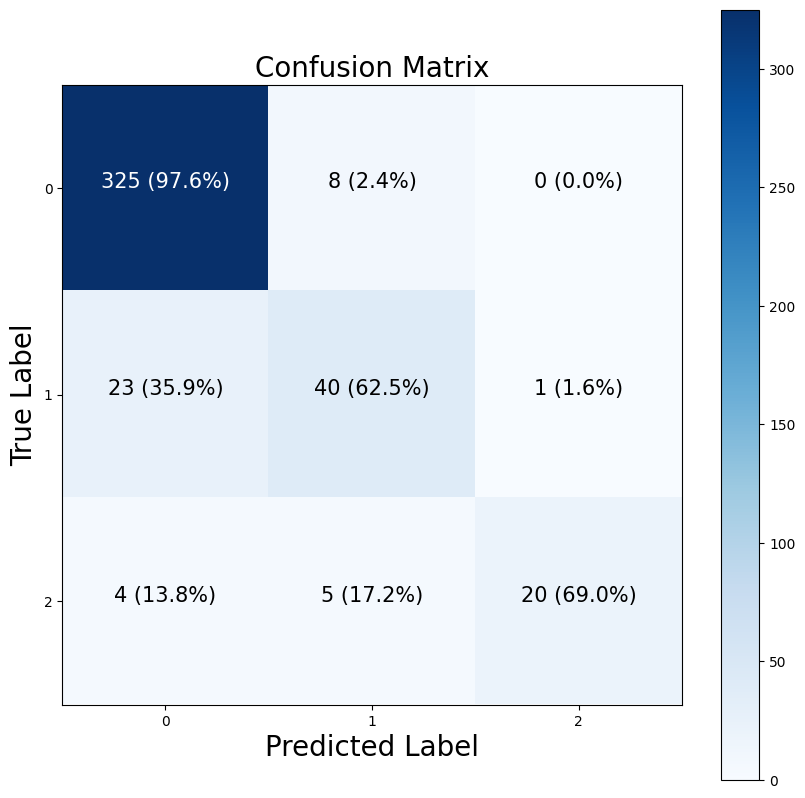

In [174]:
# prettify the confusion matrix
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

import itertools

figsize = (10, 10)

# create the confusion matrix
cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis] # normalize confusion matrix
n_classes = cm.shape[0]

# prettify it
fig, ax = plt.subplots(figsize = figsize)
# create a matrix plot
cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# create classes
classes = False
labels = np.arange(cm.shape[0])

# label the axes
ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment = "center",
           color = "white" if cm[i, j] > threshold else "black",
           size = 15)